# **Exercício computacional (baseado no exercício 5.11) do livro Du & Swamy (2019).**

Seja a função y = φ(x1 + 2x2) + 0,5(x1 − x2)**2 + 0,5Ni;

onde φ(·) é a função sigmoidal logística;

N é um número sorteado da distribuição normal padrão;

i= 1,2;

e 0<=x1,x2<=1.

Pede-se:


(a) Gere, informe e plote 200 pontos (140 pontos para treinamento, 30 pontos
para validaçao e 30 pontos para testes) pertencentes a duas classes diferentes,
metade para cada uma das distribuições normais;
# **GERAÇÃO DE DADOS**

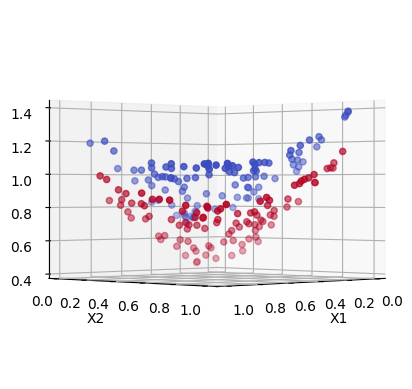

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função logística (sigmoidal)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Gerar pontos pertencentes às duas classes diferentes
def generate_points(num_points, c):
    x = np.random.rand(num_points, 2)  # Gerar pontos x1 e x2 entre 0 e 1
    N = np.random.randn()  # Número sorteado da distribuição normal padrão

    y_values = []
    for j in x:
        y = calculate_y(j[0], j[1], N)
        y_values.append(y)
    y_values = np.array(y_values)
    c_values = np.full((num_points, 1), c)

    return np.concatenate((x, y_values.reshape(-1, 1), c_values), axis=1)

# Função para calcular y conforme especificado
def calculate_y(x1, x2, N):
    return sigmoid(x1 + 2*x2) + 0.5*(x1 - x2)**2 + 0.5*N

# Gerar os pontos de dados
c1 = generate_points(100, 1)
c2 = generate_points(100, 2)

# Juntar os pontos de ambas as classes
data = np.concatenate((c1, c2), axis=0)

# Plotar os pontos em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dividir os pontos em x, y e z
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# Colorir os pontos de acordo com a classe
ax.scatter(x, y, z, c=data[:, 3], cmap='coolwarm')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

ax.view_init(elev=0, azim=45)

plt.show()

Na imagem acima os pontos representam X1, X2, Y

gerados usando Ni (número sorteado da distribuição normal padrão)

onde os vermelhos foram gerados por N1 e os azuis por N2

In [25]:
from sklearn.model_selection import train_test_split

# Separar os dados em features (x) e rótulos (y)
x = data[:, :-1]  # Todas as colunas, exceto a última
y = data[:, -1]   # Última coluna

# Dividir os dados em treino, teste e validação
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=60, random_state=42)  # 140 para treino, 60 para teste e validação
x_test, x_valid, y_test, y_valid = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)  # 30 para teste, 30 para validação

# Verificar os tamanhos dos conjuntos de dados
print("Tamanho de x_train:", x_train.shape)
print("Tamanho de x_test:", x_test.shape)
print("Tamanho de x_valid:", x_valid.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)
print("Tamanho de y_valid:", y_valid.shape)

Tamanho de x_train: (140, 3)
Tamanho de x_test: (30, 3)
Tamanho de x_valid: (30, 3)
Tamanho de y_train: (140,)
Tamanho de y_test: (30,)
Tamanho de y_valid: (30,)


Separação dos dados onde

**x_train|y_train:** entrada|saída do conjunto de treino

**x_valid|y_valid:** entrada|saída do conjunto de validação

**x_test|y_test:** entrada|saída do conjunto de teste

(b) Escreva um programa implementando o MLP-BP de três camadas e rode para
determinar a acurácia;

# **MLP-BP**

Época 1/200, Acurácia: 0.5000
Época 2/200, Acurácia: 0.6000
Época 3/200, Acurácia: 0.5667
Época 4/200, Acurácia: 0.5333
Época 5/200, Acurácia: 0.6000
Época 6/200, Acurácia: 0.7000
Época 7/200, Acurácia: 0.5667
Época 8/200, Acurácia: 0.5000
Época 9/200, Acurácia: 0.5000
Época 10/200, Acurácia: 0.7333
Época 11/200, Acurácia: 0.8333
Época 12/200, Acurácia: 0.6667
Época 13/200, Acurácia: 0.8667
Época 14/200, Acurácia: 0.8333
Época 15/200, Acurácia: 0.8000
Época 16/200, Acurácia: 0.8000
Época 17/200, Acurácia: 0.8667
Época 18/200, Acurácia: 0.8667
Época 19/200, Acurácia: 0.8667
Época 20/200, Acurácia: 0.7667
Época 21/200, Acurácia: 0.7667
Época 22/200, Acurácia: 0.8333
Época 23/200, Acurácia: 0.8667
Época 24/200, Acurácia: 0.8333
Época 25/200, Acurácia: 0.8333
Época 26/200, Acurácia: 0.8667
Época 27/200, Acurácia: 0.9000
Época 28/200, Acurácia: 0.9000
Época 29/200, Acurácia: 0.8667
Época 30/200, Acurácia: 0.9000
Época 31/200, Acurácia: 0.8667
Época 32/200, Acurácia: 0.9000
Época 33/200, Acu

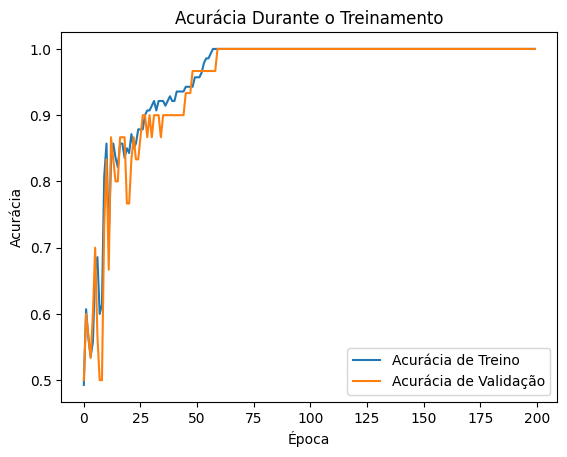

In [26]:
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np

# Ignorar os warnings de ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Definindo os hiperparâmetros
n_epochs = 200

# Inicializar o melhor modelo para posterior avaliação
mlp = MLPClassifier(hidden_layer_sizes=(6,), activation='tanh', learning_rate_init=0.1, max_iter=1, warm_start=True, random_state=42)

train_accuracies = []
valid_accuracies = []

for epoch in range(n_epochs):
    mlp.partial_fit(x_train, y_train, classes=np.unique(y_train))
    accuracy = mlp.score(x_train, y_train)
    train_accuracies.append(accuracy)
    accuracy = mlp.score(x_valid, y_valid)
    valid_accuracies.append(accuracy)
    print(f"Época {epoch + 1}/{n_epochs}, Acurácia: {accuracy:.4f}")

# Avaliação do melhor modelo encontrado
print("Precisão no treino: ", mlp.score(x_train, y_train))
print("Precisão no teste: ", mlp.score(x_test, y_test))

# Acessando os pesos
print("Pesos da camada de entrada para a camada oculta:")
print(mlp.coefs_[0])  # Pesos da camada de entrada para a camada oculta
print("Pesos da camada oculta para a camada de saída:")
print(mlp.coefs_[1])  # Pesos da camada oculta para a camada de saída

# Visualizar a acurácia a cada época
plt.plot(train_accuracies, label='Acurácia de Treino')
plt.plot(valid_accuracies, label='Acurácia de Validação')
plt.title('Acurácia Durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

**Treino = 100%**

**Validação = 100%**

**Teste = 100%**